## Neural Network for Image Recognition

### Problem Statement 

Build various types neural networks for image classification problem to test their performance and validate using k-fold validation

### Dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

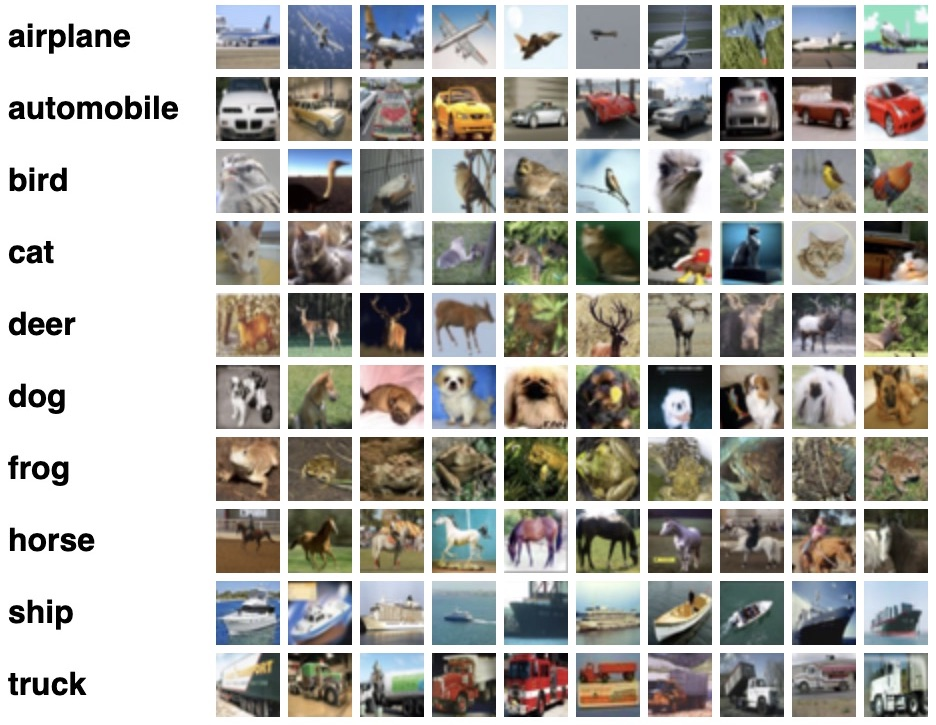

In [1]:
import tensorflow as tf
from tensorflow.keras import backend
backend.clear_session()
from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt
import numpy as np

#### Load the cifar10 dataset 

In [2]:
# downloads dataset if unavailable
(X_train,Y_train),(X_test,Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [27]:
# reshape to 1D array
Y_train.shape
y_train_reshape = Y_train.reshape(-1)

In [4]:
# custom array to display labels
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
# function to plot image and label
def PlotImage(index,X,Y):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

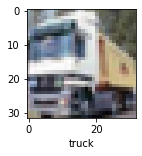

In [6]:
PlotImage(1,X_train,y_train_reshape)

In [7]:
# Normalize data
X_train = X_train / 255
X_test = X_test / 255

### Artificial Neural Network (ANN)
An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron receives a signal then processes it and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs

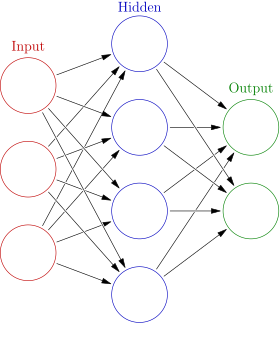

#### Implementation
* The Input layer consists of flatten array of 32X32 image
* 2 Hidden layers with relu activation funcion with 3000 and 1000 neurons
* Output layer with 10 neurons to represent 10 output image classes
* softmax activation keeps overall sum of output neurons to 1
* The model is trained for 5 Epoch 
* The model is validated using K-fold with k=3

In [8]:
from tensorflow.keras.models import Sequential
from sklearn.model_selection import KFold

y_test_reshape = Y_test.reshape(-1)

#from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

# Define the K-fold Cross Validator
kfold = KFold(n_splits=3, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train_reshape, y_test_reshape), axis=0)

for train, test in kfold.split(X_train, y_train_reshape):
#Initialize ANN      
    ann = Sequential([
            layers.Flatten(input_shape=(32,32,3)),
            layers.Dense(3000, activation='relu'),
            layers.Dense(1000, activation='relu'),
            layers.Dense(10, activation='softmax')    
        ])
    
    #printing fold number
    print("------------------------------------------------------------------------")
    print(f'Training for fold {fold_no} ...')

    ann.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # fit model 
    ann.fit(X_train[train], y_train_reshape[train], epochs=5)
    
    #evaluate model
    ann.evaluate(X_train[test], y_train_reshape[test])
    
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
1042/1042 [==============================] - 40s 35ms/step - loss: 1.8544 - accuracy: 0.33860s - loss: 1
Epoch 2/5
1042/1042 [==============================] - 36s 35ms/step - loss: 1.6663 - accuracy: 0.4113
Epoch 3/5
1042/1042 [==============================] - 36s 35ms/step - loss: 1.5806 - accuracy: 0.4424
Epoch 4/5
1042/1042 [==============================] - 37s 36ms/step - loss: 1.5234 - accuracy: 0.4625
Epoch 5/5
521/521 [==============================] - 7s 12ms/step - loss: 1.6028 - accuracy: 0.4361
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
1042/1042 [==============================] - 37s 35ms/step - loss: 1.8592 - accuracy: 0.3347
Epoch 2/5
1042/1042 [==============================] - 39s 37ms/step - loss: 1.6766 - accuracy: 0.4065
Epoch 3/5
1042/1042 [==============================] - 36s 34ms/step - loss:

#### Evaluation 

In [9]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.49      0.50      1000
           1       0.52      0.63      0.57      1000
           2       0.37      0.34      0.36      1000
           3       0.40      0.22      0.28      1000
           4       0.43      0.34      0.38      1000
           5       0.37      0.41      0.39      1000
           6       0.48      0.59      0.53      1000
           7       0.59      0.47      0.52      1000
           8       0.44      0.76      0.55      1000
           9       0.57      0.38      0.46      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.45     10000
weighted avg       0.47      0.46      0.45     10000



## Convolutional Neural Network(CNN)

A convolutional neural network consists of an input layer, hidden layers and an output layer. In any feed-forward neural network, any middle layers are called hidden because their inputs and outputs are masked by the activation function and final convolution. In a convolutional neural network, the hidden layers include layers that perform convolutions.Typically this includes a layer that performs a dot product of the convolution kernel with the layer's input matrix. This product is usually the Frobenius inner product, and its activation function is commonly ReLU

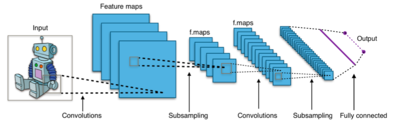

#### Implementation
* The Input layer consists of flatten array of 32X32 image
* 2 convolution layers with relu activation funcion with 32 and 64 filters respectively
* Output layer with 10 neurons to represent 10 output image classes uses softmax activation 
* softmax activation keeps overall sum of output neurons to 1
* The model is trained for 10 Epoch 
* The model is validated using K-fold with k=3

In [10]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=3, shuffle=True)

#k-fold initialize
fold_no = 1

#Initialize CNN
for train, test in kfold.split(X_train, y_train_reshape):
    cnn = Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
    
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
    
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    #fit model
    cnn.fit(X_train[train], y_train_reshape[train], epochs=10)
    
    #evaluate model
    cnn.evaluate(X_train[test],y_train_reshape[test])
    
    fold_no = fold_no + 1

Epoch 1/10
1042/1042 [==============================] - 20s 18ms/step - loss: 1.5844 - accuracy: 0.4251
Epoch 2/10
1042/1042 [==============================] - 20s 19ms/step - loss: 1.2275 - accuracy: 0.5681
Epoch 3/10
1042/1042 [==============================] - 19s 18ms/step - loss: 1.0781 - accuracy: 0.6227
Epoch 4/10
1042/1042 [==============================] - 19s 18ms/step - loss: 0.9834 - accuracy: 0.6577
Epoch 5/10
1042/1042 [==============================] - 19s 18ms/step - loss: 0.9189 - accuracy: 0.68060s - loss: 0.9191 - accuracy: 0.68
Epoch 6/10
1042/1042 [==============================] - 19s 19ms/step - loss: 0.8496 - accuracy: 0.7047
Epoch 7/10
1042/1042 [==============================] - 20s 19ms/step - loss: 0.8038 - accuracy: 0.7191
Epoch 8/10
1042/1042 [==============================] - 19s 18ms/step - loss: 0.7461 - accuracy: 0.7422
Epoch 9/10
1042/1042 [==============================] - 19s 19ms/step - loss: 0.7017 - accuracy: 0.7592
Epoch 10/10
521/521 [=========

In [11]:
# Predictions for test data
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.32365201e-03, 1.14011527e-05, 8.28876626e-03, 9.03910518e-01,
        1.13368420e-04, 4.01468836e-02, 4.11592564e-03, 2.53438076e-04,
        3.72260325e-02, 1.61004206e-03],
       [9.73187014e-02, 1.89287439e-01, 3.72365583e-04, 3.28778406e-05,
        6.54079427e-04, 6.07853849e-07, 6.94700475e-08, 2.53432772e-05,
        7.02146888e-01, 1.01615284e-02],
       [1.06730044e-01, 2.03523532e-01, 8.89340066e-04, 2.34803231e-03,
        9.47423279e-03, 9.85276056e-05, 2.42264083e-04, 4.29915061e-04,
        6.31875813e-01, 4.43883054e-02],
       [9.82894421e-01, 3.17439716e-03, 6.48920366e-04, 9.58096862e-05,
        1.49384676e-03, 1.85387435e-07, 3.80310921e-05, 1.22258034e-05,
        1.16099790e-02, 3.21842344e-05],
       [2.03095215e-06, 2.03252557e-06, 5.29531809e-03, 4.50458862e-02,
        4.21736926e-01, 6.61268306e-04, 5.27168155e-01, 3.42790227e-05,
        5.33557177e-05, 7.56188456e-07]], dtype=float32)

In [12]:
# First 20 predictions
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 9, 4, 9, 7, 7, 9, 6, 5, 7, 8, 6]

In [13]:
# First 20 Actual test labels
Y_test = Y_test.reshape(-1,)
Y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

#### The Overall Accuracy of the trained CNN is around 67% 
* The first 9 predictions are accurate from the above lists
* for 10th Image - Our model predicts 9 whereas actual label is 1

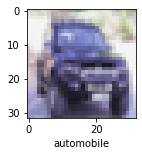

In [24]:
PlotImage(9,X_test, Y_test)

In [25]:
classes[y_classes[9]]

'truck'

#### Since the accuracy of our model is around 67% , our model classified Image of the automobile to class truck.

### Evaluate

In [26]:
print("Classification Report: \n", classification_report(Y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.75      0.71      1000
           1       0.82      0.77      0.79      1000
           2       0.61      0.49      0.54      1000
           3       0.45      0.54      0.49      1000
           4       0.66      0.56      0.61      1000
           5       0.71      0.42      0.53      1000
           6       0.70      0.81      0.75      1000
           7       0.62      0.78      0.69      1000
           8       0.84      0.75      0.79      1000
           9       0.70      0.82      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

